# Лабораторна робота №1

**Виконав:** студент групи МІТ-31
Черевач Юрій Анатолійович

## Завдання
### ***1. NumPy*** 
створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця). Використати arange, random.

In [1]:
import numpy as np

#CREATE
print(f"\nCREATE")
print('_____'*10 + '\n')

#create data using arange
data_arange = np.arange(16)
print(f"Arange data: {data_arange}")

#create data using random
data_random = np.random.randint(0, 100, 16)
print(f"Random data: {data_random}")

#create vector
data_vector = np.array([1,2,3,4,5,6])
print(f"Vector data: {data_vector}")
#create matrix 
data_matrix = np.array([[1,2], [3,4], [5,6]])
print(f"\nMatrix data: \n{data_matrix}")


CREATE
__________________________________________________

Arange data: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Random data: [69 39 95 15 91 86  0 75 66  8 61 42 46 43  8 31]
Vector data: [1 2 3 4 5 6]

Matrix data: 
[[1 2]
 [3 4]
 [5 6]]


In [2]:
#READ
print(f"\nREAD")
print('_____'*10 + '\n')

#scalar element of vector
scalar = data_vector[0]
print(f"\nScalar element of vector: {scalar}")

#read subset of vector
sub_vector = data_vector[1:3]
print(f"Subset of vector: {sub_vector}")


#read subset of matrix
sub_matrix = data_matrix[0:, 1]
print(f"Subset of matrix, second column: {sub_matrix}")


READ
__________________________________________________


Scalar element of vector: 1
Subset of vector: [2 3]
Subset of matrix, second column: [2 4 6]


In [3]:
#UPDATE
print(f"\nUPDATE")
print('_____'*10 + '\n')

#update vector
data_vector[3] = 0
print(f"Update vector data: {data_vector}")

#update matrix
data_matrix[0, 0] = 9
print(f"Update matrix data: \n{data_matrix}")


UPDATE
__________________________________________________

Update vector data: [1 2 3 0 5 6]
Update matrix data: 
[[9 2]
 [3 4]
 [5 6]]


In [4]:
#DELETE
print(f"\nDELETE")
print('_____'*10 + '\n')

#delete from vector
data_vector = np.delete(data_vector, [0,2])
print(f"Delete first and third element: {data_vector}")

#delete from matrix
data_matrix = np.delete(data_matrix, 1, axis=0)
print(f"Delete second row: \n{data_matrix}")


DELETE
__________________________________________________

Delete first and third element: [2 0 5 6]
Delete second row: 
[[9 2]
 [5 6]]


### ***2. Pandas***

створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...)

In [5]:
import pandas as pd

#dataframe from dictionary
df_dict = pd.DataFrame(
    {
        'Poroshenko':['Maryna', 'Petro', 'Oleksii', 'Yevheniia', 'Oleksandra', 'Mykhailo'],
        'Age':[61, 58, 38, 23, 23, 22],
        'Education':['NMU', 'KNU, NU OLA', 'KNU, LSE', 'Concord College', 'Concord College', 'Concord College']
    }
)
print(f"Dictionary DF: \n{df_dict}")

Dictionary DF: 
   Poroshenko  Age        Education
0      Maryna   61              NMU
1       Petro   58      KNU, NU OLA
2     Oleksii   38         KNU, LSE
3   Yevheniia   23  Concord College
4  Oleksandra   23  Concord College
5    Mykhailo   22  Concord College


In [6]:
#dataframe from numpy array
df_numpy = pd.DataFrame(data_arange[::-1], columns=['Numbers'])
print(f"Number DF: \n{df_numpy}")

Number DF: 
    Numbers
0        15
1        14
2        13
3        12
4        11
5        10
6         9
7         8
8         7
9         6
10        5
11        4
12        3
13        2
14        1
15        0


In [7]:
#data manipulation & inexation
print(df_dict.head(1)) #output 1 line
print(f"\n{df_dict.describe()}") #describe statistic values (Age column)
print(f"\n{df_dict.iloc[3]}") #indexation iloc
print(f"\n{df_dict.loc[3, 'Education']}") #indexation iloc


  Poroshenko  Age Education
0     Maryna   61       NMU

             Age
count   6.000000
mean   37.500000
std    18.074844
min    22.000000
25%    23.000000
50%    30.500000
75%    53.000000
max    61.000000

Poroshenko          Yevheniia
Age                        23
Education     Concord College
Name: 3, dtype: object

Concord College


### ***3. Matplotlib***

створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE. Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)

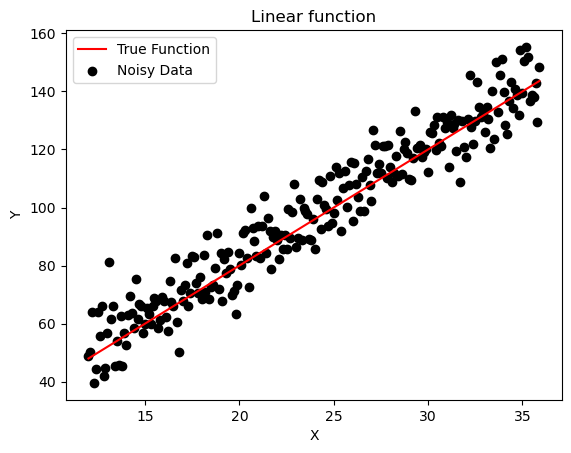

MAE: 6.358731546103019
MSE: 64.30646116212903


In [8]:
import matplotlib.pyplot as plt

X = np.arange(12, 36, 0.1)
Y = 4*X
noise = np.random.normal(3, 7, X.shape)
Y_noise = Y + noise

plt.plot(X, Y, 'red', label='True Function')
plt.scatter(X, Y_noise, color='black', label='Noisy Data',marker='o')
plt.title("Linear function")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

MAE = np.mean(np.abs(Y_noise - Y)) #Mean absolute error
MSE = np.mean((Y_noise - Y)**2) #Mean squared error

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")

dataFrameToCSV = pd.DataFrame(
    {
        "X": X,
        "Y": Y,
        "Y_hat": Y_noise,
        "MAE": [MAE] * len(X),
        "MSE": [MSE] * len(X)
    }
)
dataFrameToCSV.to_csv('dataframe.csv', index=False)